# Feedforward Neural Network 
This notebook implements a simple yet effective FNN model.

## 1. Import Libraries

In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from tensorflow.keras.optimizers import Adam

In [44]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## 2. Load Pre-processed Data

In [45]:
X_train_scaled = pd.read_csv('../dataset/train_test_split/X_train_scaled.csv').values
y_train = pd.read_csv('../dataset/train_test_split/y_train.csv').values
X_test_scaled = pd.read_csv('../dataset/train_test_split/X_test_scaled.csv').values
y_test = pd.read_csv('../dataset/train_test_split/y_test.csv').values

## 3. Build Feedforward Neural Network

In [70]:
dropout = 0.7

def build_fnn_model(input_dim, learning_rate=0.001):
    """
    Build a Feedforward Neural Network
    
    Args:
        input_dim: Number of input features
        learning_rate: Learning rate for optimizer
    
    Returns:
        Compiled Keras model
    """
    model = Sequential([
        # Input layer
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(dropout),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),
        
        Dense(32, activation='relu'),
        
        # Output layer (regression)
        Dense(1, activation='linear')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss = tf.keras.losses.Huber(delta=1.0),  # Use Huber as loss,
        metrics=['mae', 'mse']
    )
    
    return model


## 4. Setup Callbacks

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'checkpoint/best_fnn_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

## 5. Train the Model

In [72]:
class TrainingLogger(Callback):
    def on_train_begin(self, logs=None):
        print("🚀 Training started...")

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 20 == 0:
            print(f"✅ Epoch {epoch+1} done. Loss: {logs['loss']:.4f}, Val Loss: {logs['val_loss']:.4f}")

    def on_train_end(self, logs=None):
        print("🏁 Training finished.")

    def on_train_batch_end(self, batch, logs=None):
        pass  # no per-batch output

In [77]:
input_dim = X_train_scaled.shape[1]

model = build_fnn_model(input_dim)
print(model.summary())

history = model.fit(
    X_train_scaled, 
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=128,
    callbacks=[early_stop, reduce_lr, checkpoint, TrainingLogger()],
    verbose=0
)

c:\Users\grise\OneDrive\Desktop\AI-challenge\SolarSystemForecaster\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 346,881 (1.32 MB)

 Trainable params: 343,681 (1.31 MB)

 Non-trainable params: 3,200 (12.50 KB)

None
🚀 Training started...

Epoch 1: val_loss improved from None to 20.26570, saving model to chackpoint/best_fnn_model.h5



Epoch 2: val_loss did not improve from 20.26570

Epoch 3: val_loss improved from 20.26570 to 17.71286, saving model to chackpoint/best_fnn_model.h5



Epoch 4: val_loss improved from 17.71286 to 15.81653, saving model to chackpoint/best_fnn_model.h5



Epoch 5: val_loss improved from 15.81653 to 14.87668, saving model to chackpoint/best_fnn_model.h5



Epoch 6: val_loss improved from 14.87668 to 14.50106, saving model to chackpoint/best_fnn_model.h5



Epoch 7: val_loss improved from 14.50106 to 14.37154, saving model to chackpoint/best_fnn_model.h5



Epoch 8: val_loss improved from 14.37154 to 14.21350, saving model to chackpoint/best_fnn_model.h5



Epoch 9: val_loss did not improve from 14.21350

Epoch 10: val_loss did not improve from 14.21350

Epoch 11: val_loss did not improve from 14.21350

Epoch 12: val_loss did not improve from 14.21350

Epoch 13: val_loss improved from 14.21350 to 14.20052, saving model to chackpoint/best_fnn_model.h5



Epoch 14: val_loss improved from 14.20052 to 14.10239, saving model to chackpoint/best_fnn_model.h5



Epoch 15: val_loss improved from 14.10239 to 13.93919, saving model to chackpoint/best_fnn_model.h5



Epoch 16: val_loss did not improve from 13.93919

Epoch 17: val_loss did not improve from 13.93919

Epoch 18: val_loss improved from 13.93919 to 13.82161, saving model to chackpoint/best_fnn_model.h5



Epoch 19: val_loss did not improve from 13.82161

Epoch 20: val_loss did not improve from 13.82161
✅ Epoch 20 done. Loss: 16.3312, Val Loss: 13.9871

Epoch 21: val_loss did not improve from 13.82161

Epoch 22: val_loss did not improve from 13.82161

Epoch 23: val_loss improved from 13.82161 to 13.76455, saving model to chackpoint/best_fnn_model.h5



Epoch 24: val_loss improved from 13.76455 to 13.73382, saving model to chackpoint/best_fnn_model.h5



Epoch 25: val_loss improved from 13.73382 to 13.71520, saving model to chackpoint/best_fnn_model.h5



Epoch 26: val_loss improved from 13.71520 to 13.68098, saving model to chackpoint/best_fnn_model.h5



Epoch 27: val_loss did not improve from 13.68098

Epoch 28: val_loss did not improve from 13.68098

Epoch 29: val_loss did not improve from 13.68098

Epoch 30: val_loss did not improve from 13.68098

Epoch 31: val_loss did not improve from 13.68098

Epoch 32: val_loss did not improve from 13.68098

Epoch 33: val_loss improved from 13.68098 to 13.56564, saving model to chackpoint/best_fnn_model.h5



Epoch 34: val_loss did not improve from 13.56564

Epoch 35: val_loss did not improve from 13.56564

Epoch 36: val_loss did not improve from 13.56564

Epoch 37: val_loss improved from 13.56564 to 13.56115, saving model to chackpoint/best_fnn_model.h5



Epoch 38: val_loss improved from 13.56115 to 13.48582, saving model to chackpoint/best_fnn_model.h5



Epoch 39: val_loss did not improve from 13.48582

Epoch 40: val_loss did not improve from 13.48582
✅ Epoch 40 done. Loss: 16.0300, Val Loss: 13.5552

Epoch 41: val_loss improved from 13.48582 to 13.47164, saving model to chackpoint/best_fnn_model.h5



Epoch 42: val_loss improved from 13.47164 to 13.43683, saving model to chackpoint/best_fnn_model.h5



Epoch 43: val_loss improved from 13.43683 to 13.40530, saving model to chackpoint/best_fnn_model.h5



Epoch 44: val_loss did not improve from 13.40530

Epoch 45: val_loss did not improve from 13.40530

Epoch 46: val_loss did not improve from 13.40530

Epoch 47: val_loss did not improve from 13.40530

Epoch 48: val_loss did not improve from 13.40530

Epoch 49: val_loss improved from 13.40530 to 13.26907, saving model to chackpoint/best_fnn_model.h5



Epoch 50: val_loss did not improve from 13.26907

Epoch 51: val_loss did not improve from 13.26907

Epoch 52: val_loss did not improve from 13.26907

Epoch 53: val_loss did not improve from 13.26907

Epoch 54: val_loss did not improve from 13.26907

Epoch 55: val_loss did not improve from 13.26907

Epoch 56: val_loss did not improve from 13.26907

Epoch 57: val_loss did not improve from 13.26907

Epoch 58: val_loss did not improve from 13.26907

Epoch 59: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 59: val_loss did not improve from 13.26907

Epoch 60: val_loss did not improve from 13.26907
✅ Epoch 60 done. Loss: 15.6223, Val Loss: 13.4037

Epoch 61: val_loss did not improve from 13.26907

Epoch 62: val_loss did not improve from 13.26907

Epoch 63: val_loss did not improve from 13.26907

Epoch 64: val_loss did not improve from 13.26907

Epoch 65: val_loss did not improve from 13.26907

Epoch 66: val_loss did not improve from 13.26907

Epoch 67: val_loss di

## 6. Training Visualization

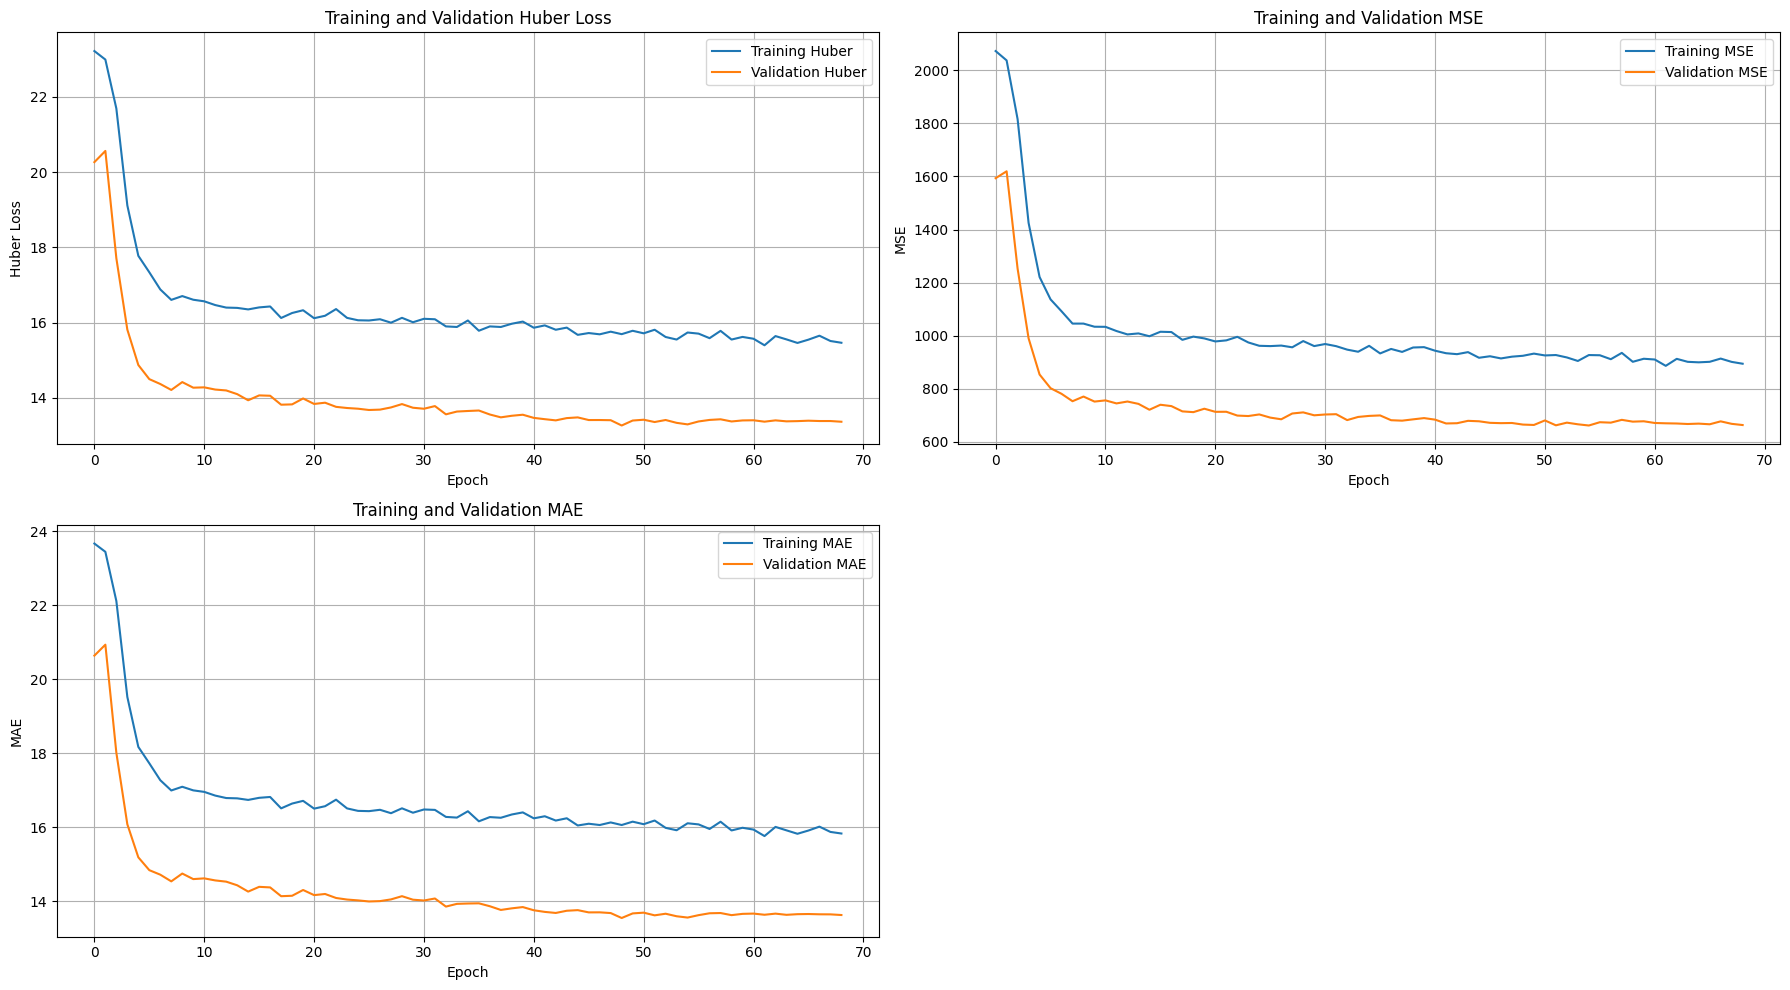

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))  # 2 rows, 2 columns

# Huber Loss curves
axes[0, 0].plot(history.history['loss'], label='Training Huber')
axes[0, 0].plot(history.history['val_loss'], label='Validation Huber')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Huber Loss')
axes[0, 0].set_title('Training and Validation Huber Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# MSE curves
axes[0, 1].plot(history.history['mse'], label='Training MSE')
axes[0, 1].plot(history.history['val_mse'], label='Validation MSE')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].set_title('Training and Validation MSE')
axes[0, 1].legend()
axes[0, 1].grid(True)

# MAE curves
axes[1, 0].plot(history.history['mae'], label='Training MAE')
axes[1, 0].plot(history.history['val_mae'], label='Validation MAE')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_title('Training and Validation MAE')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Hide the unused subplot (bottom right)
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('fnn_results.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Evaluate the Model

In [79]:
y_pred_train = model.predict(X_train_scaled).flatten()
y_pred_test = model.predict(X_test_scaled).flatten()

# Custom accuracy within tolerance
tolerance = 0.10  # 10% tolerance

# Training metrics
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
accuracy_train = np.mean(np.abs((y_train - y_pred_train) / y_train) <= tolerance) * 100


# Testing metrics
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
accuracy_test = np.mean(np.abs((y_test - y_pred_test) / y_test) <= tolerance) * 100


print("\n" + "="*60)
print("FEEDFORWARD NEURAL NETWORK - RESULTS")
print("="*60)
print(f"\nTraining Set:")
print(f"  MSE:  {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE:  {train_mae:.4f}")
print(f"  R²:   {train_r2:.4f}")
print(f"  Accuracy (±{tolerance*100:.0f}% tolerance): {accuracy_train:.2f}%")

print(f"\nTest Set:")
print(f"  MSE:  {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE:  {test_mae:.4f}")
print(f"  R²:   {test_r2:.4f}")
print(f"  Accuracy (±{tolerance*100:.0f}% tolerance): {accuracy_test:.2f}%")
print("="*60)

607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\grise\AppData\Local\Temp\ipykernel_21780\1483223105.py:12: RuntimeWarning: divide by zero encountered in divide
  accuracy_train = np.mean(np.abs((y_train - y_pred_train) / y_train) <= tolerance) * 100



FEEDFORWARD NEURAL NETWORK - RESULTS

Training Set:
  MSE:  816.6442
  RMSE: 28.5770
  MAE:  14.9812
  R²:   0.4535
  Accuracy (±10% tolerance): 0.79%

Test Set:
  MSE:  734.8452
  RMSE: 27.1080
  MAE:  14.6571
  R²:   0.3719
  Accuracy (±10% tolerance): 0.94%


C:\Users\grise\AppData\Local\Temp\ipykernel_21780\1483223105.py:20: RuntimeWarning: divide by zero encountered in divide
  accuracy_test = np.mean(np.abs((y_test - y_pred_test) / y_test) <= tolerance) * 100


Plotting Evaluation

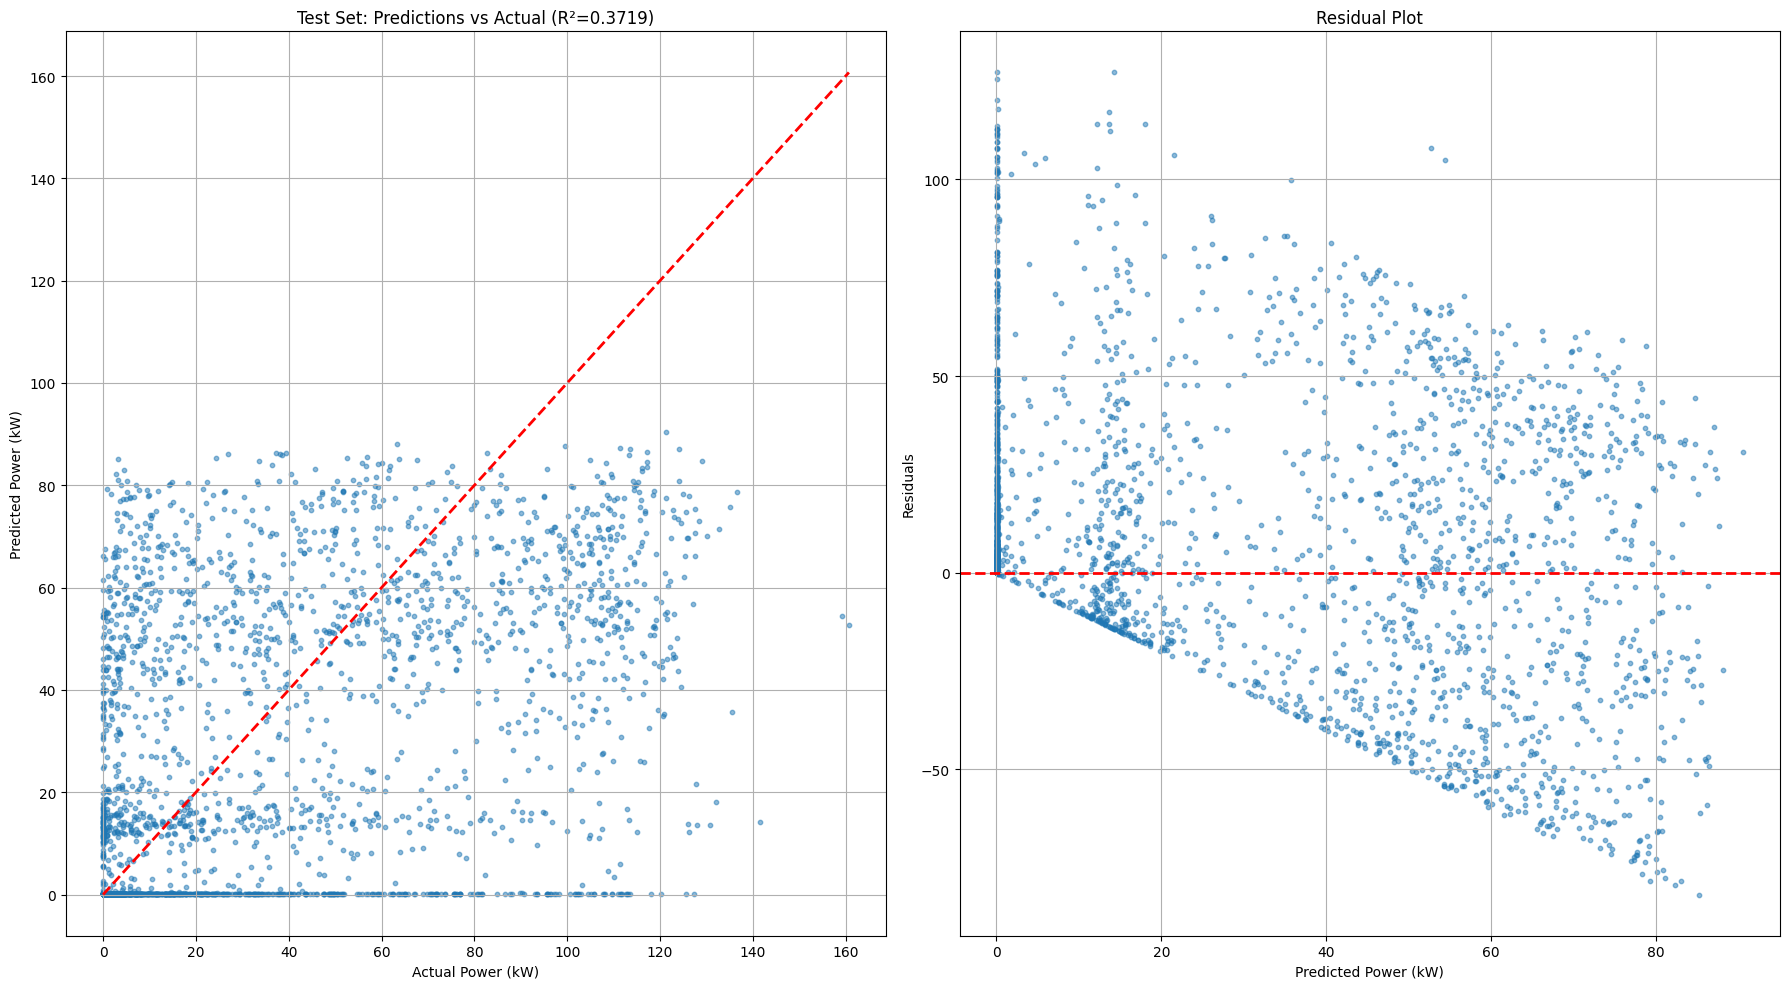

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))  # 1 rows, 2 columns

# Predictions vs Actual (Test Set)
axes[0].scatter(y_test, y_pred_test, alpha=0.5, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Power (kW)')
axes[0].set_ylabel('Predicted Power (kW)')
axes[0].set_title(f'Test Set: Predictions vs Actual (R²={test_r2:.4f})')
axes[0].grid(True)

# Residuals plot
y_test_flat = y_test.flatten()
y_pred_test_flat = y_pred_test.flatten()
residuals = y_test_flat - y_pred_test_flat
axes[1].scatter(y_pred_test_flat, residuals, alpha=0.5, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Power (kW)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(True)

plt.tight_layout()
plt.savefig('fnn_results.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Save the Model

In [ ]:
model.save('fnn_solar_final.h5')
print("\nModel saved as 'fnn_solar_final.h5'")

## 9. Save Predictions

In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test,
    'Residual': residuals
})
results_df.to_csv('fnn_predictions.csv', index=False)
print("Predictions saved as 'fnn_predictions.csv'")